In [35]:
from sklearn.datasets import fetch_lfw_people
from skimage.feature import hog
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns


# Loading and preprocessing the LFW dataset
lfw_people = fetch_lfw_people(min_faces_per_person=40, resize=0.4)
X = lfw_people.images
y = lfw_people.target

# Extracting HOG features
hog_features = []
for image in X:
    features, hog_image = hog(image, orientations=9, pixels_per_cell=(4,4),
                               cells_per_block=(2,2), visualize=True)
    hog_features.append(features)

# Splitting
X_hog = np.array(hog_features)
y = lfw_people.target
X_train, X_test, y_train, y_test = train_test_split(X_hog, y, test_size=0.15, random_state=42)
print("HOG Features :",X_train.shape)


HOG Features : (1586, 3168)


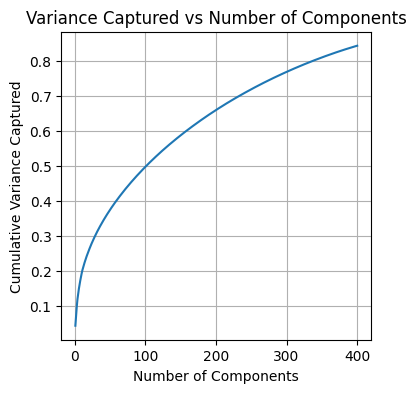

In [36]:
# Applying PCA on HOG features
n_components = 400
pca = PCA(n_components=n_components)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Plotting variance captured vs components
plt.figure(figsize=(4, 4))
plt.plot(range(1, pca.n_components_ + 1), cumulative_variance_ratio, linestyle='-')
plt.title('Variance Captured vs Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Captured')
plt.grid(True)
plt.show()

In [38]:
## Linear Kernel SVM
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print("Linear Kernel Accuracy :",accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d',
            xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


# Polynomial Kernel SVM
param_grid = {
              'C': np.logspace(-1,2,4),
              'degree' : [2,3,4],
              'gamma': np.logspace(-2,2,4)}
svm = SVC(kernel='poly')
grid_search = GridSearchCV(svm, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best parameters for Poly Kernel : ", best_params)
y_pred = grid_search.best_estimator_.predict(X_test)
print("Polynomial Kernel Accuracy : ",accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d',
            xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


# RBF Kernel SVM
param_grid = {
              'C': np.logspace(-1,3,5),
              'gamma': np.logspace(-3,1,5)}
svm = SVC(kernel='rbf')
grid_search = GridSearchCV(svm, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best parameters for RBF Kernel : ", best_params)
y_pred = grid_search.best_estimator_.predict(X_test)
print("RBF Kernel Accuracy : ", accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d',
            xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

Linear Kernel Accuracy : 0.8078291814946619
Best parameters for Poly Kernel :  {'C': 0.1, 'degree': 2, 'gamma': 0.21544346900318834}
Polynomial Kernel Accuracy :  0.6156583629893239
Best parameters for RBF Kernel :  {'C': 1000.0, 'gamma': 0.0001}
RBF Kernel Accuracy :  0.8078291814946619
